In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
from google.colab import files 
uploaded = files.upload()

Saving imputed features_final.csv to imputed features_final.csv
Saving Optimal target.csv to Optimal target.csv
Saving Real target_no92.csv to Real target_no92.csv


In [4]:
import io
feature = pd.read_csv(io.BytesIO(uploaded['imputed features_final.csv'])) 
optimal_target = pd.read_csv(io.BytesIO(uploaded['Optimal target.csv'])) 
real_target = pd.read_csv(io.BytesIO(uploaded['Real target_no92.csv'])) 

In [5]:
opt_data = pd.merge(feature, optimal_target, on = 'SubjectID')
opt_data = opt_data.drop(columns=['SubjectID','Unnamed: 0_x', 'Unnamed: 0.1', 'Unnamed: 0_y'])
opt_data = opt_data[['Age', 'Gender', 'onset_site', 'onset_delta',
       'diag_minus_onset', 'slope_alsfrs_tot',
       'fvc_slope', 'fvc_mean',  'mean_Q10_Respiratory',
       'mean_Bulbar', 'mean_motor', 'slope_Q1_Speech', 'slope_Q2_Salivation',
       'slope_Q3_Swallowing', 'slope_Q4_Handwriting', 'slope_Q5_Cutting',
       'slope_Q6_Dressing_and_Hygiene', 'slope_Q7_Turning_in_Bed',
       'slope_Q8_Walking', 'slope_Q9_Climbing_Stairs', 'slope_Q10_Respiratory', 
       'time_opt', 'status_opt']]

In [6]:
y = opt_data[['status_opt']]

In [7]:
from sklearn.model_selection import train_test_split

df_train, df_test, y_train, y_test = train_test_split(opt_data, y, train_size=0.8, test_size=0.2, random_state=11)

In [8]:
!pip install lifelines

     |████████████████████████████████| 348kB 11.0MB/s 
     |████████████████████████████████| 61kB 7.1MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-cp37-none-any.whl size=4035 sha256=45a59343f5117788ca928d9328974308d1345bb41244c1f49118c7837e3b32da
  Stored in directory: /root/.cache/pip/wheels/dc/68/dc/91321c55fba449755524481854f5be70d41912b8f886f908bb
Successfully built autograd-gamma


In [9]:
from lifelines import WeibullAFTFitter

aft = WeibullAFTFitter()
aft.fit(df_train, duration_col='time_opt', event_col='status_opt', ancillary=False)

aft.print_summary(3)

<lifelines.WeibullAFTFitter: fitted with 2713 total observations, 2184 right-censored observations>
             duration col = 'time_opt'
                event col = 'status_opt'
   number of observations = 2713
number of events observed = 529
           log-likelihood = -3956.391
         time fit was run = 2021-05-22 06:30:16 UTC

---
                                        coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param   covariate                                                                                                                             
lambda_ Age                           -0.014      0.987      0.002           -0.017           -0.010                0.983                0.990
        Gender                         0.061      1.063      0.041           -0.019            0.142                0.981                1.152
        diag_minus_onset              -0.000      1.000      0.000           -0.001           -0.000                0.999                1.000
        fvc_mean                       0.006      1.006      0.001            0.004            0.009                1.004                1.009
        fvc_slope                      0.223      1.250      0.063            0.100            0.347                1.105                1.414
        mean_Bulbar                    0.229      1.257      0.017            0.195            0.263                1.216                1.300
        mean_Q10_Respiratory          -0.039      0.961      0.032           -0.101            0.023                0.904                1.023
        mean_motor                     0.019      1.019      0.005            0.010            0.028                1.010                1.028
        onset_delta                   -0.001      0.999      0.000           -0.001           -0.001                0.999                0.999
        onset_site                    -0.163      0.850      0.059           -0.278           -0.048                0.757                0.953
        slope_Q10_Respiratory         -2.332      0.097      2.022           -6.294            1.630                0.002                5.106
        slope_Q1_Speech                1.153      3.169      1.957           -2.682            4.989                0.068              146.764
        slope_Q2_Salivation            3.045     21.019      2.151           -1.171            7.261                0.310             1424.293
        slope_Q3_Swallowing           -1.196      0.302      2.200           -5.508            3.116                0.004               22.563
        slope_Q4_Handwriting          -3.021      0.049      2.076           -7.089            1.047                0.001                2.850
        slope_Q5_Cutting              -1.957      0.141      1.786           -5.457            1.544                0.004                4.682
        slope_Q6_Dressing_and_Hygiene  2.036      7.659      2.514           -2.891            6.963                0.056             1056.583
        slope_Q7_Turning_in_Bed       -1.120      0.326      0.831           -2.748            0.508                0.064                1.662
        slope_Q8_Walking              -0.488      0.614      2.425           -5.241            4.266                0.005               71.223
        slope_Q9_Climbing_Stairs      -1.323      0.266      1.871           -4.990            2.344                0.007               10.425
        slope_alsfrs_tot               1.417      4.123      1.476           -1.477            4.310                0.228               74.430
        Intercept                      5.060    157.571      0.183            4.701            5.419              110.047              225.619
rho_    Intercept                      0.806      2.238      0.030            0.746            0.865                2.109                2.376

                                           z       p   -log2(p)
param   covariate   

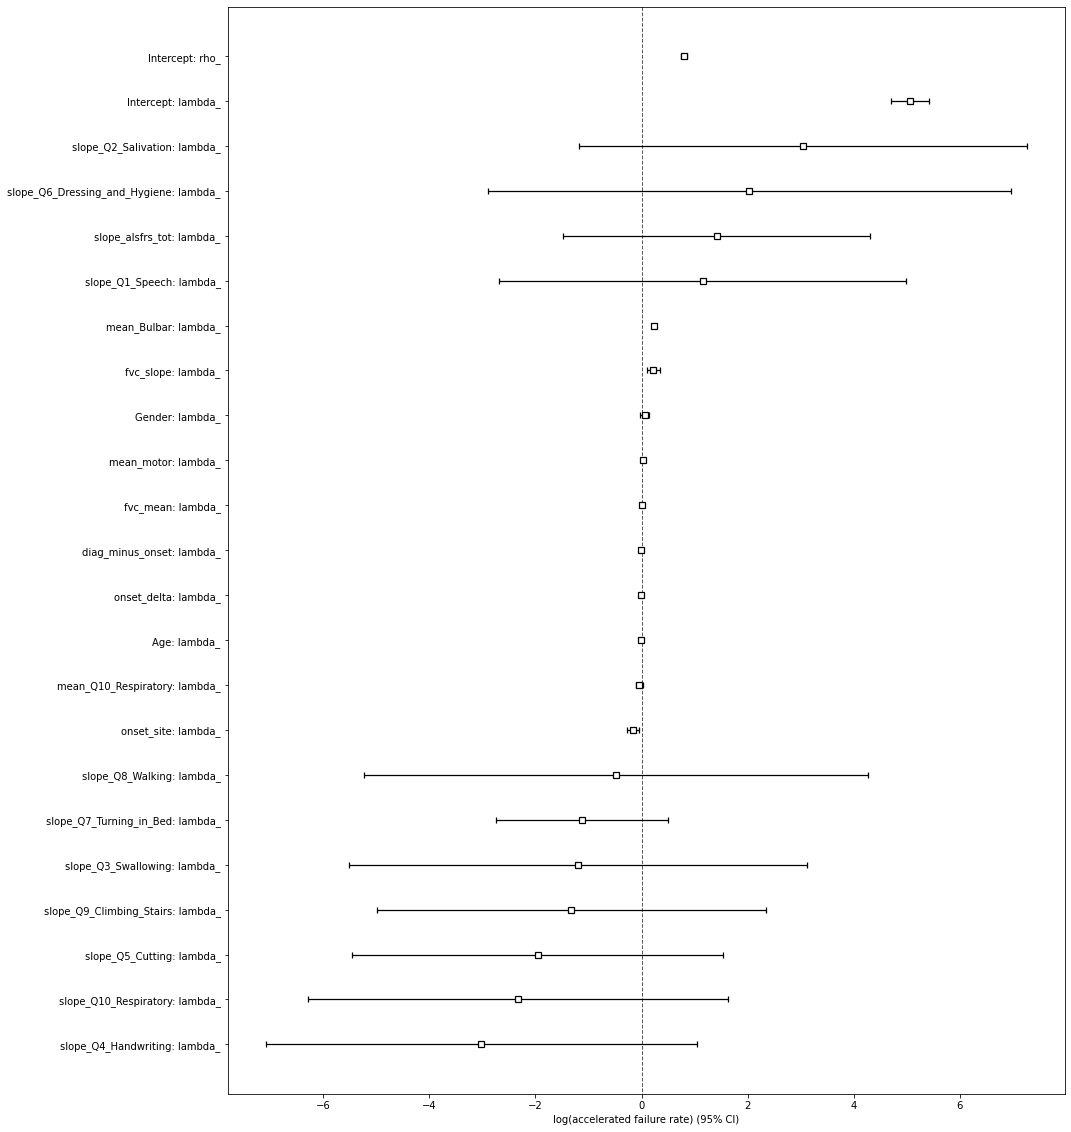

In [14]:
from matplotlib import pyplot as plt

wft = WeibullAFTFitter().fit(df_train, 'time_opt', 'status_opt', ancillary=False)
plt.figure(figsize=(15,20))
wft.plot()

In [11]:
from lifelines.utils import k_fold_cross_validation

In [12]:
aft = WeibullAFTFitter()
C_Idx = np.array([])
random_num_list = [10,20,30,40,50,60,70,80,90,100]

for i in random_num_list:
    arr = k_fold_cross_validation(aft, df_train, 'time_opt', event_col='status_opt', k=5, scoring_method="concordance_index")
    C_Idx = np.concatenate((C_Idx, arr))
print(C_Idx)

[0.79340992 0.81880815 0.85402027 0.84033885 0.85525947 0.83323205
 0.83247342 0.87440569 0.84485762 0.82145025 0.84509695 0.8308445
 0.85033784 0.84440166 0.82145224 0.85619089 0.84228966 0.82411293
 0.82759331 0.84163056 0.8086775  0.84447464 0.86205591 0.8594568
 0.82006977 0.84011619 0.83138092 0.86145088 0.80627266 0.8556733
 0.83514851 0.84434481 0.83115434 0.82234552 0.85381443 0.8677581
 0.82741894 0.83971245 0.84945504 0.81502206 0.83380192 0.80731583
 0.84019941 0.83627758 0.86045457 0.81907246 0.84032485 0.82770794
 0.84312452 0.85098132]


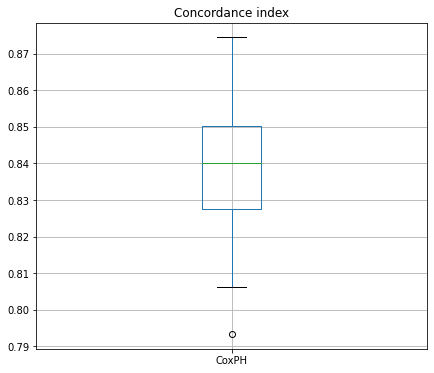

In [13]:
df = pd.DataFrame(C_Idx)
df.columns = ['CoxPH']

plt.figure(figsize=(7,6))
boxplot = df.boxplot(column=['CoxPH'])
plt.title('Concordance index')
plt.show()
